In [1]:
import matplotlib.pyplot as plt
from ipywidgets import interact
from scipy.integrate import odeint
import numpy as np
from scipy import optimize

# SIR model
\begin{array}{lcl}
 \frac{dS}{dt} &=& -\beta SI \\
 \frac{dI}{dt}  &=&  \beta SI -\gamma I \\
 \frac{dR}{dt} &=&  \gamma I \\
\end{array}

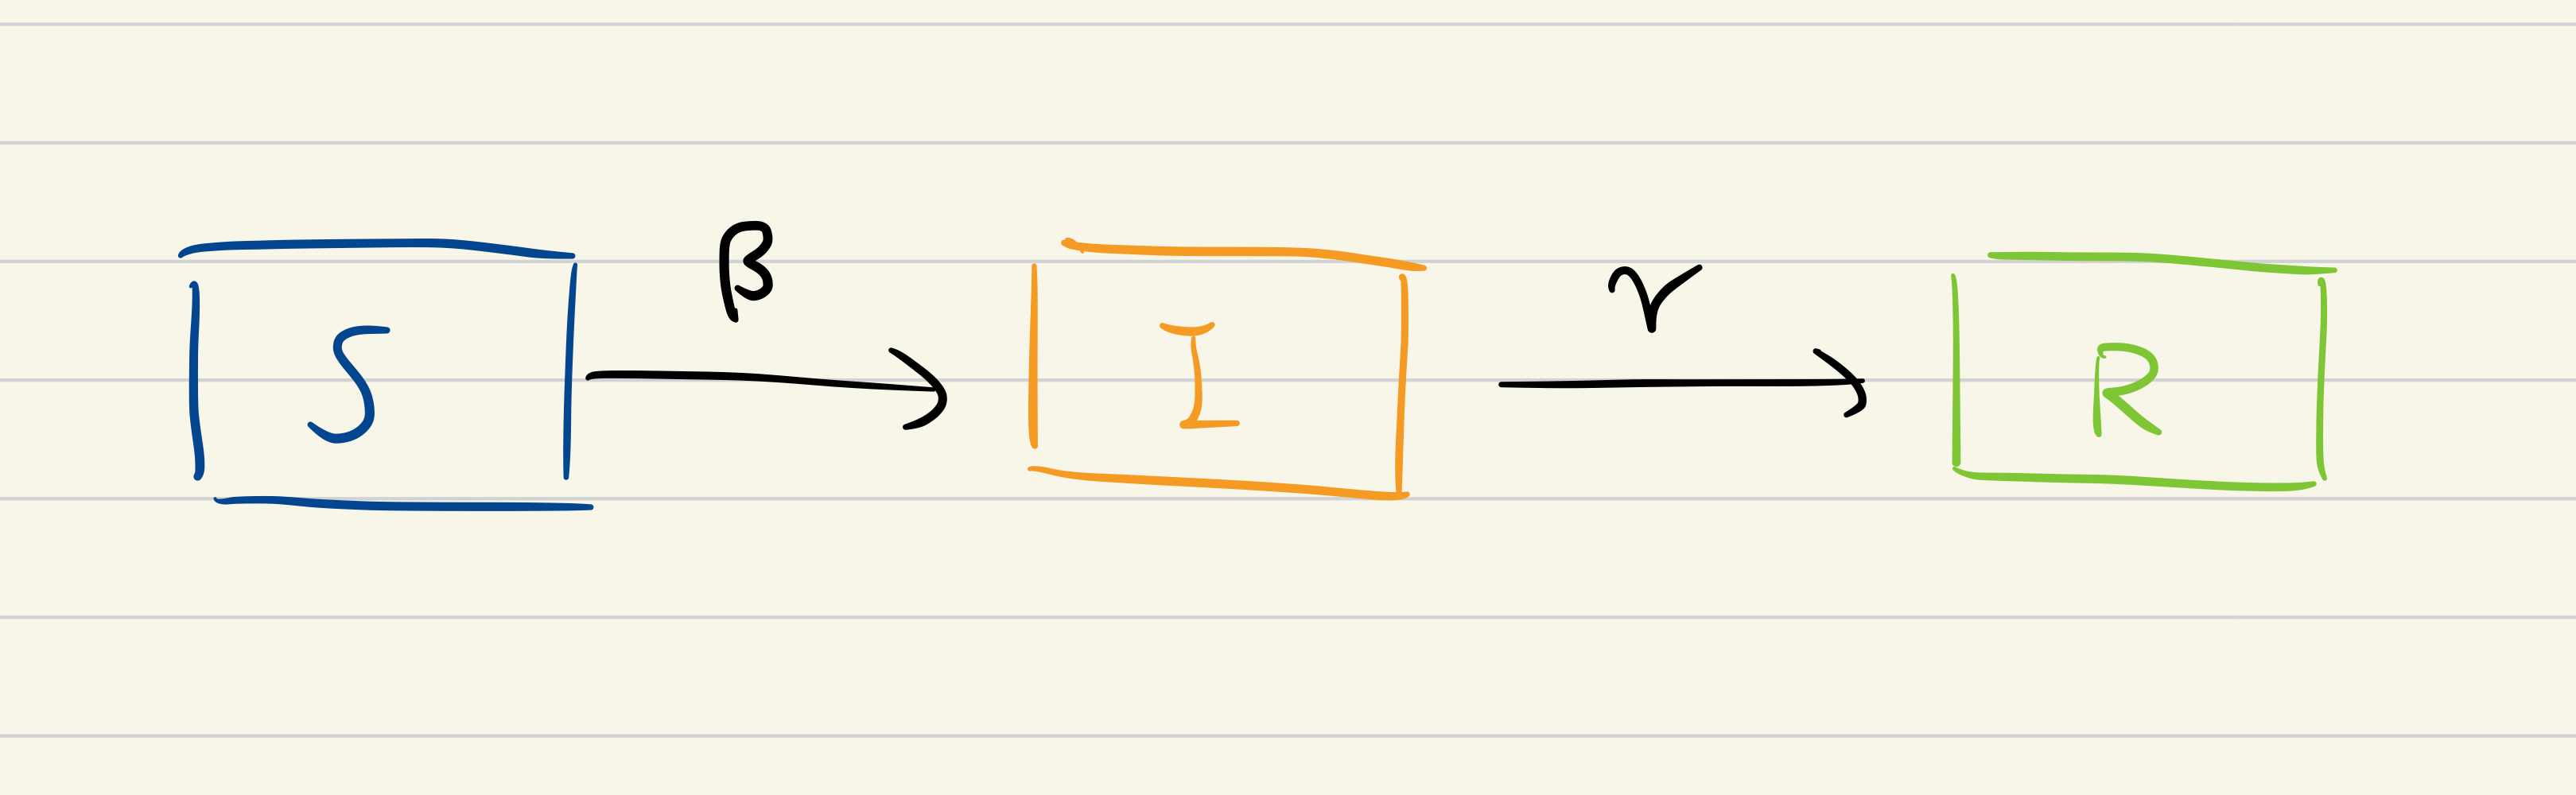

In [2]:
def SIR(v, t, beta, gamma):
    dSdt = -beta * v[0] * v[1]
    dIdt = beta * v[0] * v[1] - gamma * v[1]
    dRdt = gamma * v[1]
    return [dSdt, dIdt, dRdt]

In [3]:
def s_inf_func(x, rho, const):
    return rho * np.log(x) - x + const

In [4]:
@interact(S_0= (0, 10000, 100), I_0 = (0, 100, 1), R_0 = (0, 5, 1), t_max = (1, 1000, 1), dt = (0.001, 2, 0.001), Nbeta = (0.01, 2, 0.01), gamma = (0.01, 1, 0.01))

def SIR_plot(S_0 = 999, I_0 = 1, R_0 = 0, t_max = 160, dt = 0.001, Nbeta = 0.2, gamma = 1./10):
    ini_state = [S_0,I_0,R_0] #[S[0], I[0], R[0]]
    N_total = S_0+I_0+R_0
    #numerical integration
    times = np.arange(0, t_max, dt)
    beta = Nbeta / N_total
    args  = (beta, gamma)

    #R0
    R0 = N_total * beta *(1/gamma)
    print("Reproduction Number: ", R0)

    #Numerical Solution using scipy.integrate
    #Solver SIR model
    result = odeint(SIR, ini_state, times, args)
    rho = gamma / beta
    const = I_0 + S_0 - rho * np.log(S_0)
    theo_I_max = - rho + rho * np.log(rho) + const
    theo_S_inf = optimize.fsolve(s_inf_func, 20, (rho, const))
    #plot
    plt.plot(times,result)
    plt.hlines(theo_I_max, 0, t_max, colors='orange', linestyle='dashed')
    plt.hlines(theo_S_inf, 0, t_max, colors='blue', linestyle='dashed')
    plt.legend(['Susceptible','Infectious', 'Recovered', "$max(I)$(Theoretical)", "$S_{\infty}$(Theoretical)"])

interactive(children=(IntSlider(value=999, description='S_0', max=10000, step=100), IntSlider(value=1, descrip…

---

# SEIR model
\begin{array}{lcl}
 \frac{dS}{dt} &=& -\beta SI \\
 \frac{dE}{dt}  &=&  \beta SI -\epsilon E \\
 \frac{dI}{dt}  &=&  \epsilon E -\gamma I \\
 \frac{dR}{dt} &=&  \gamma I \\
\end{array}

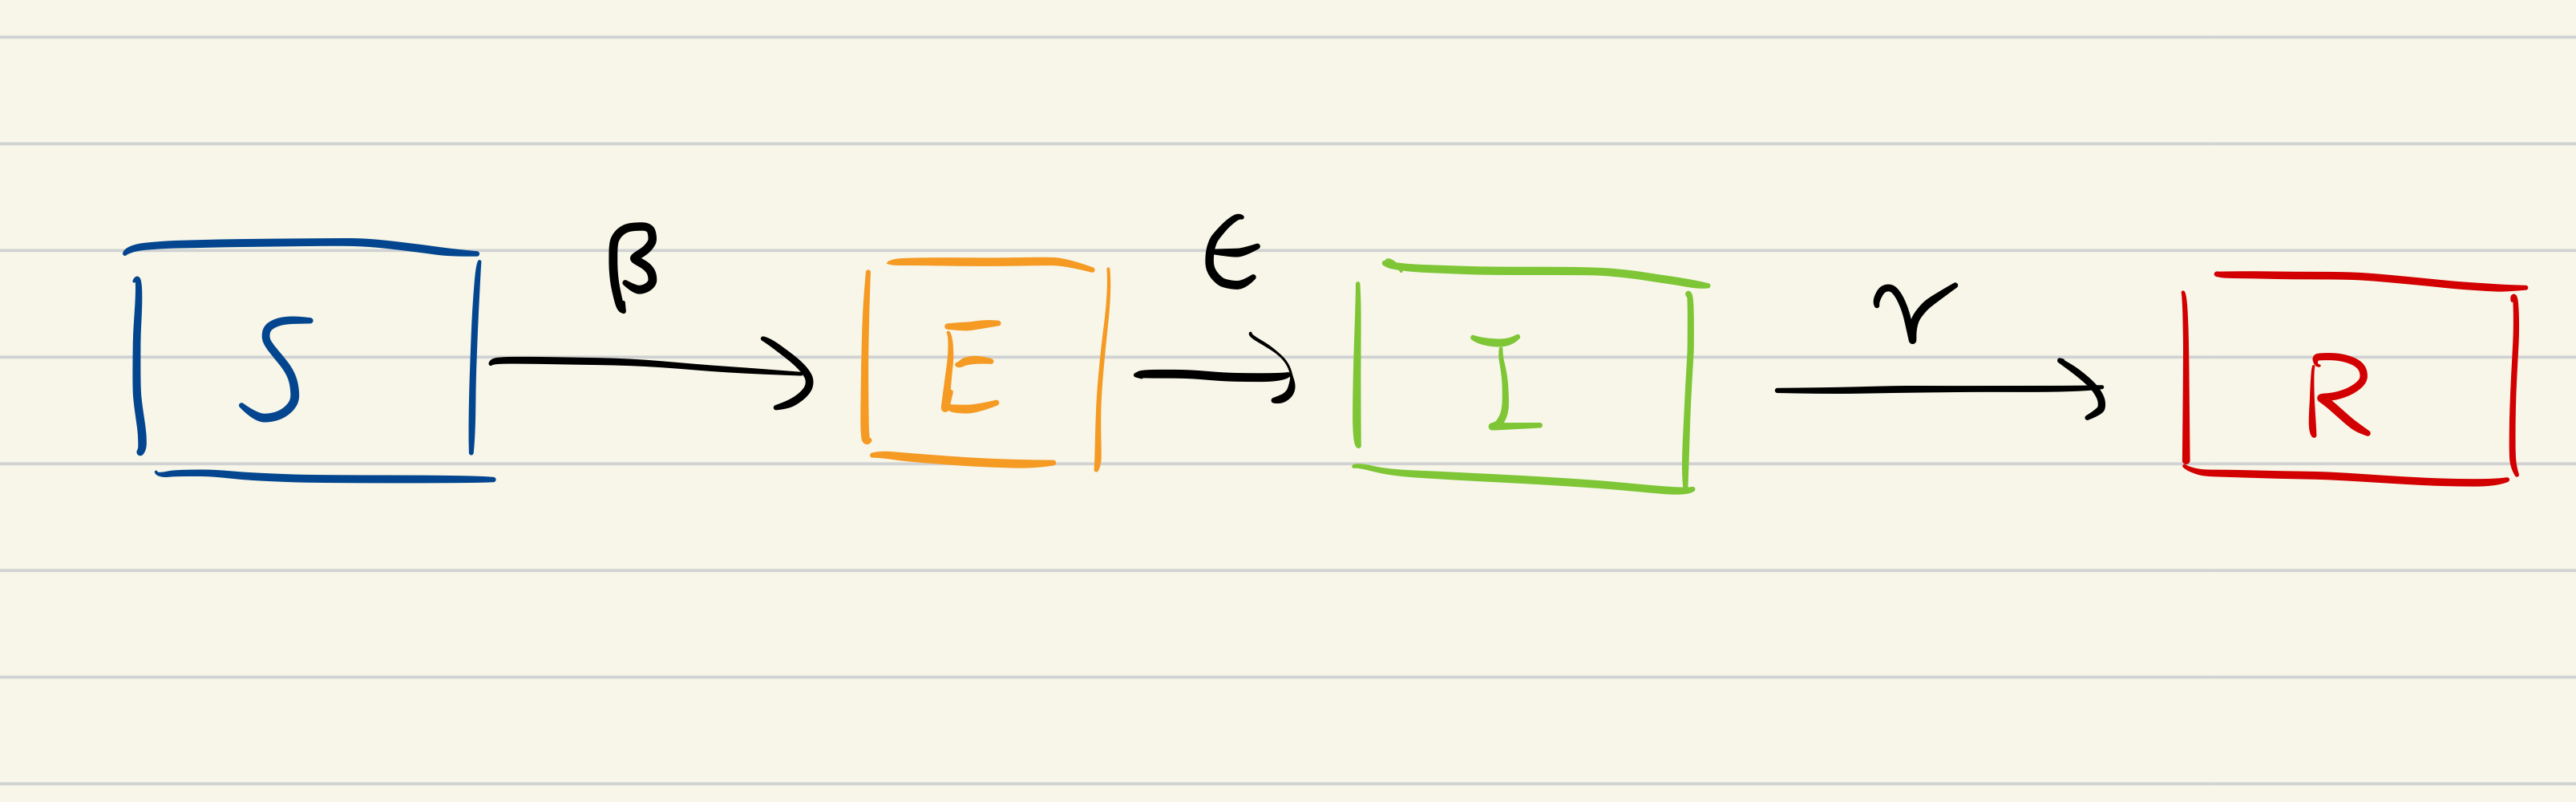

In [5]:
def SEIR(v, t, beta, gamma, epsilon):
    dSdt = -beta * v[0] * v[2]
    dEdt = beta * v[0] * v[2] - epsilon * v[1]
    dIdt = epsilon * v[1] - gamma * v[2]
    dRdt = gamma * v[2]
    return [dSdt, dEdt, dIdt, dRdt]

In [6]:
@interact(S_0= (0, 10000, 100), E_0 = (0, 100, 1), I_0 = (0, 100, 1), R_0 = (0, 5, 1), t_max = (1, 1000, 1), dt = 0.01, Nbeta = (0.01, 1, 0.01), gamma = (0.01, 1, 0.01), epsilon = (0.01, 1, 0.01))

def SIR_plot(S_0 = 999, E_0 = 1, I_0 = 0, R_0 = 0, t_max = 160, dt = 0.01, Nbeta = 0.2, gamma = 1./10, epsilon = 0.5):
  ini_state = [S_0, E_0, I_0, R_0] #[S[0], E[0], I[0], R[0]]
  N_total = S_0 + E_0 + I_0 + R_0
  #numerical integration
  times = np.arange(0, t_max, dt)
  beta = Nbeta / N_total
  args  = (beta, gamma, epsilon)

  #R0
  #R0 = N_total * beta *(1/gamma)
  #print("Reproduction Number: ", R0)
  #Numerical Solution using scipy.integrate
  #Solver SIR model
  result = odeint(SEIR, ini_state, times, args)
  #plot
  plt.plot(times,result)
  plt.legend(['Susceptible', 'Exposed', 'Infectious', 'Recovered'])


interactive(children=(IntSlider(value=999, description='S_0', max=10000, step=100), IntSlider(value=1, descrip…

---

# SVIR model
\begin{array}{lcl}
 \frac{dS}{dt} &=&  - \alpha S -\beta_{S} SI  \\
 \frac{dV}{dt}  &=& \alpha S - \beta_{V} VI \\
 \frac{dI}{dt}  &=&  \beta_{S} SI + \beta_{V} VI  -\gamma I \\
 \frac{dR}{dt} &=&  \gamma I \\
\end{array}

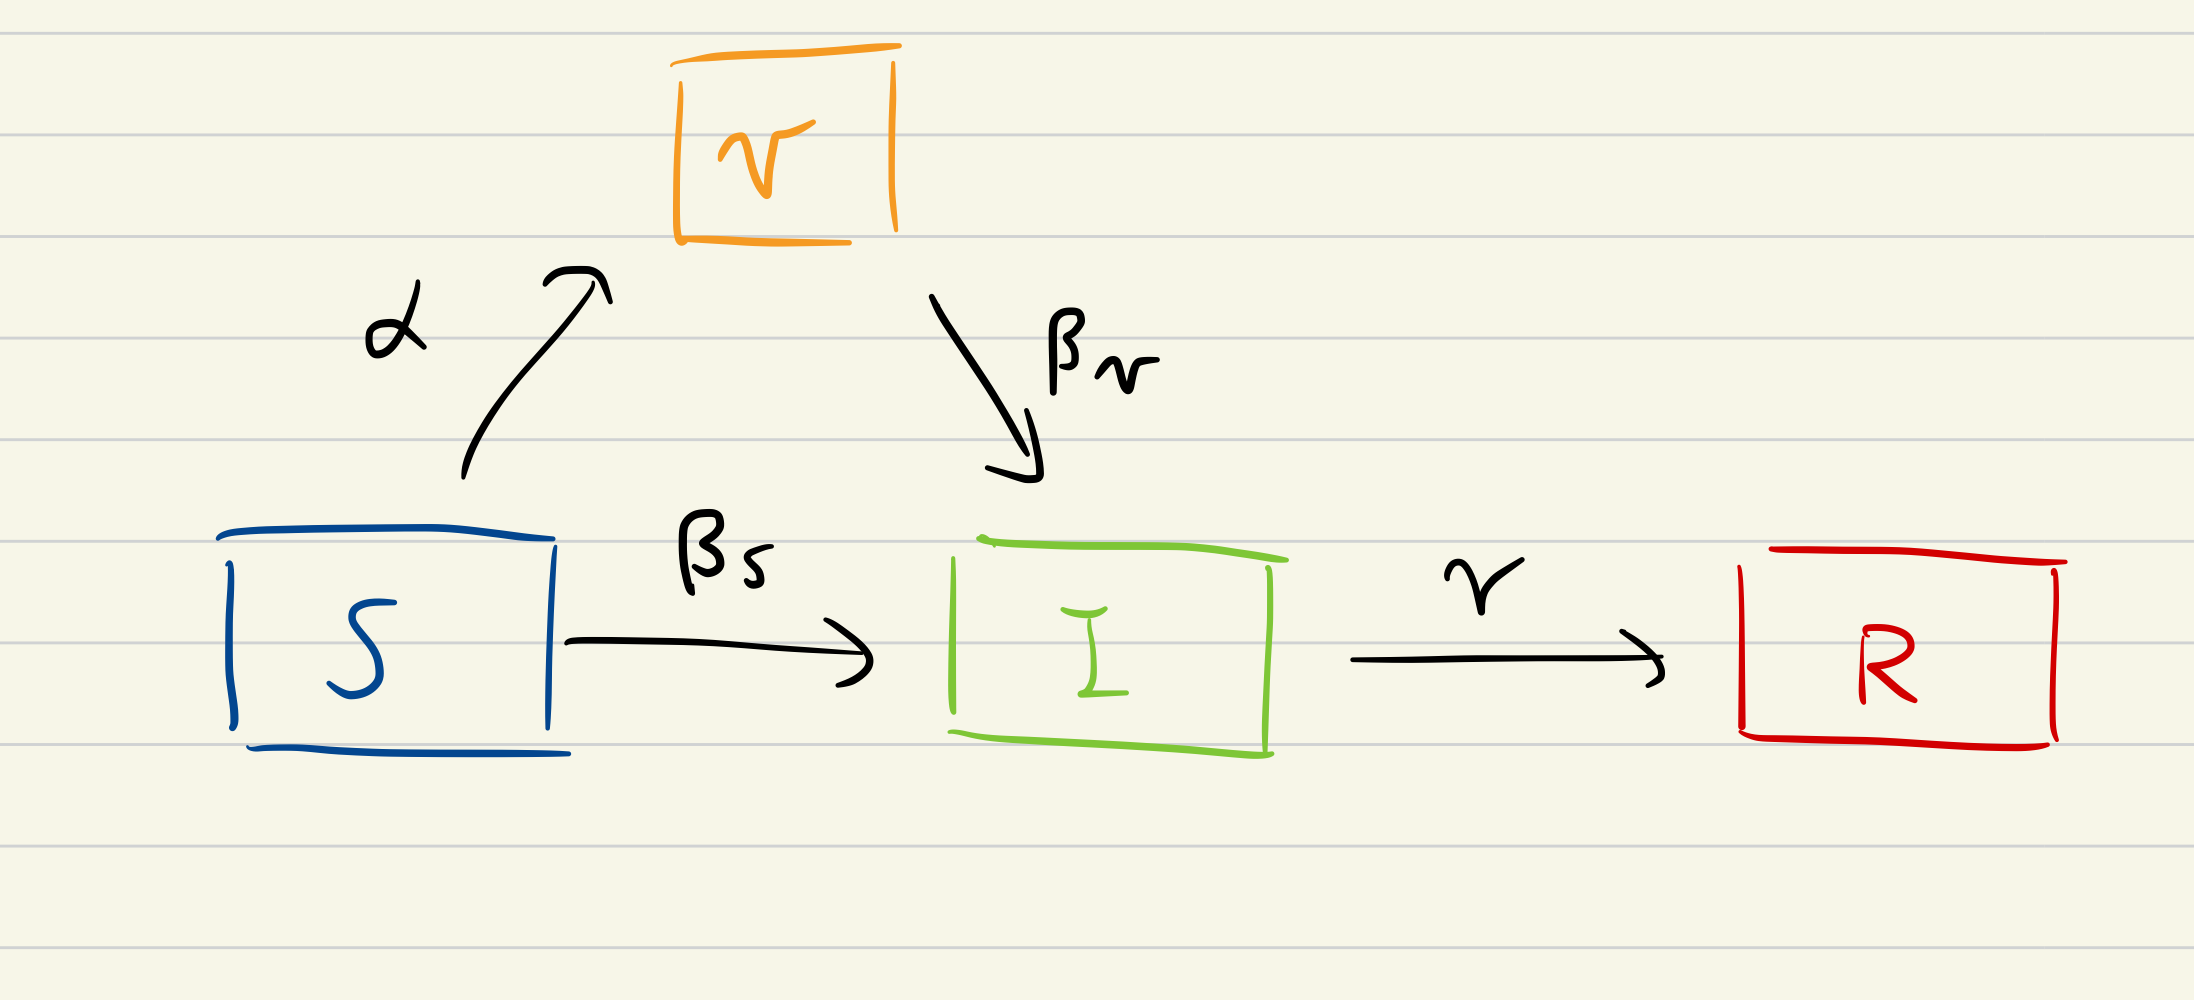

In [7]:
def SVIR(v, t, alpha, beta_s, beta_v, gamma):
    dSdt = - alpha * v[0] -beta_s * v[0] * v[2] 
    dVdt = alpha * v[0] - beta_v * v[1] * v[2]
    dIdt = beta_s * v[0] * v[2] + beta_v * v[1] * v[2] - gamma * v[2]
    dRdt = gamma * v[2]
    return [dSdt, dVdt, dIdt, dRdt]

In [8]:
@interact(S_0= (0, 10000, 100), V_0 = (0, 5, 1), I_0 = (0, 100, 1), R_0 = (0, 5, 1), t_max = (1, 1000, 1), dt = 0.01, alpha = (0.01, 1, 0.01), Nbeta_s = (0.01, 1, 0.01), Nbeta_v = (0.01, 1, 0.01), gamma = (0.01, 1, 0.01))

def SVIR_plot(S_0 = 999, V_0 = 0, I_0 = 1, R_0 = 0, t_max = 160, dt = 0.01, alpha = 0.01, Nbeta_s = 0.2, Nbeta_v = 0.1, gamma = 1./10):
  ini_state = [S_0, V_0, I_0, R_0] #[S[0], V[0], I[0], R[0]]
  N_total = S_0 + V_0 + I_0 + R_0
  #numerical integration
  times = np.arange(0, t_max, dt)
  beta_s = Nbeta_s / N_total
  beta_v = Nbeta_v / N_total
  args  = (alpha, beta_s, beta_v, gamma)

  #R0
  #R0 = N_total * beta *(1/gamma)
  #print("Reproduction Number: ", R0)
  #Numerical Solution using scipy.integrate
  #Solver SIR model
  result = odeint(SVIR, ini_state, times, args)
  #plot
  plt.plot(times,result)
  plt.legend(['Susceptible', 'Vaccinated', 'Infectious', 'Recovered'])

interactive(children=(IntSlider(value=999, description='S_0', max=10000, step=100), IntSlider(value=0, descrip…

---

# SVEIR model
\begin{array}{lcl}
 \frac{dS}{dt} &=&  - \alpha S -\beta_{S} SI  \\
 \frac{dV}{dt} &=& \alpha S - \beta_{V} VI \\
 \frac{dE}{dt} &=&  \beta_{S} SI + \beta_{V} VI  -\epsilon E \\
 \frac{dI}{dt}  &=&  \epsilon E - \gamma I \\
 \frac{dR}{dt} &=&  \gamma I \\
\end{array}

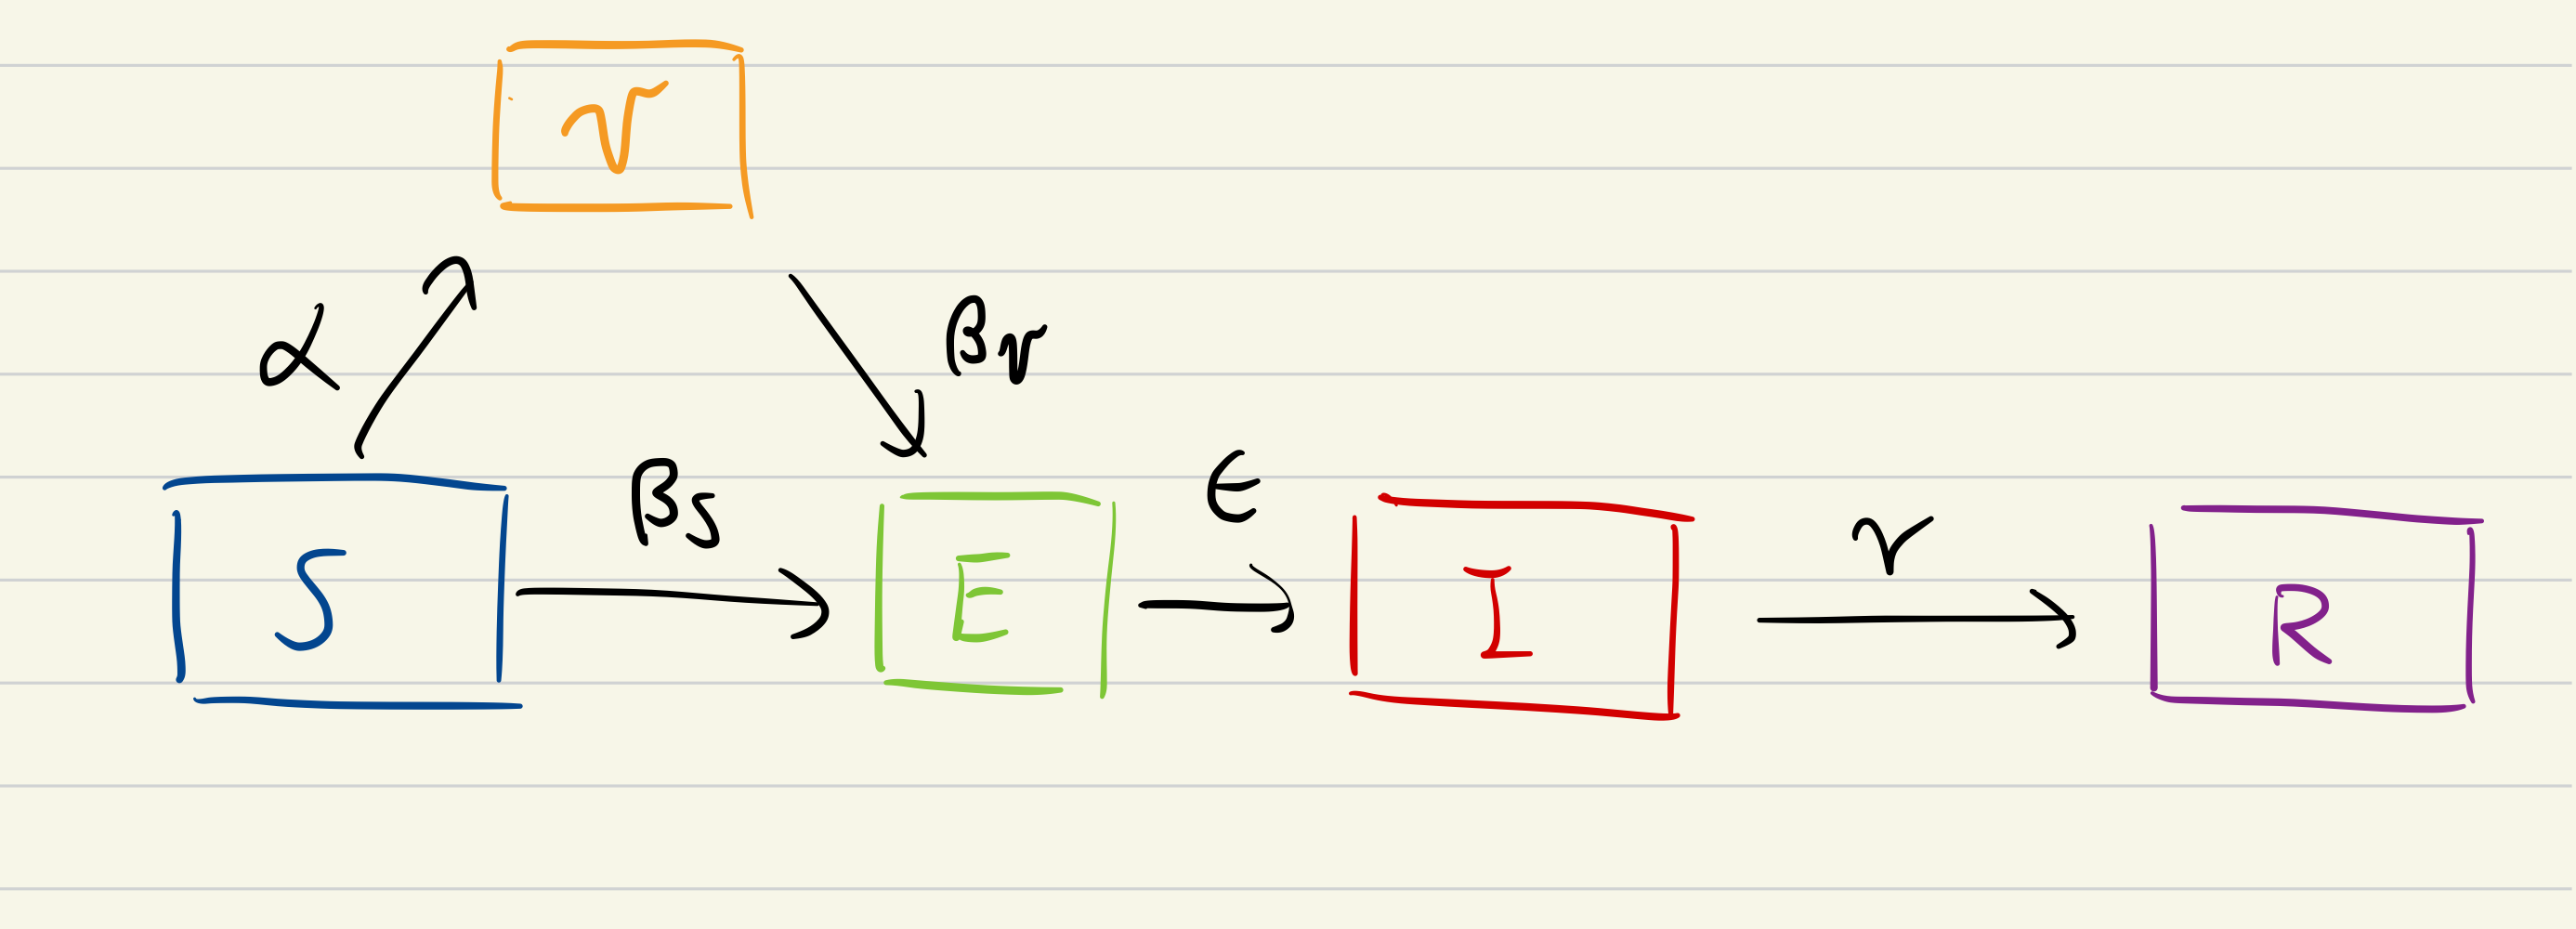

In [9]:
def SVEIR(v, t, alpha, beta_s, beta_v, gamma, epsilon):
    dSdt = - alpha * v[0] - beta_s * v[0] * v[3] 
    dVdt = alpha * v[0] - beta_v * v[1] * v[3]
    dEdt = beta_s * v[0] * v[3] + beta_v * v[1] * v[3] - epsilon * v[2]
    dIdt =  epsilon * v[2] - gamma * v[3]
    dRdt = gamma * v[3]
    return [dSdt, dVdt, dEdt, dIdt, dRdt]

In [10]:
@interact(S_0= (0, 10000, 100), V_0 = (0, 5, 1), E_0 = (0, 100, 1), I_0 = (0, 100, 1), R_0 = (0, 5, 1), t_max = (1, 1000, 1), dt = 0.01, alpha = (0.01, 1, 0.01), Nbeta_s = (0.01, 1, 0.01), Nbeta_v = (0.01, 1, 0.01), gamma = (0.01, 1, 0.01), epsilon = (0.01, 1, 0.01))

def SVEIR_plot(S_0 = 999, V_0 = 0, E_0 = 1, I_0 = 0, R_0 = 0, t_max = 160, dt = 0.01, alpha = 0.01, Nbeta_s = 0.2, Nbeta_v = 0.1, gamma = 1./10, epsilon = 0.5):
  ini_state = [S_0, V_0, E_0,  I_0, R_0] #[S[0], V[0], E[0], I[0], R[0]]
  N_total = S_0 + V_0 + E_0 + I_0 + R_0
  #numerical integration
  times = np.arange(0, t_max, dt)
  beta_s = Nbeta_s / N_total
  beta_v = Nbeta_v / N_total
  args  = (alpha, beta_s, beta_v, gamma, epsilon)

  #R0
  #R0 = N_total * beta *(1/gamma)
  #print("Reproduction Number: ", R0)
  #Numerical Solution using scipy.integrate
  #Solver SIR model
  result = odeint(SVEIR, ini_state, times, args)
  #plot
  plt.plot(times,result)
  plt.legend(['Susceptible', 'Vaccinated', 'Exposed', 'Infectious', 'Recovered'])

interactive(children=(IntSlider(value=999, description='S_0', max=10000, step=100), IntSlider(value=0, descrip…